In [18]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


{'train.csv': b'vidid,adview,views,likes,dislikes,comment,published,duration,category\nVID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F\nVID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D\nVID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C\nVID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H\nVID_10175,1,666,1,0,0,2016-06-29,PT31S,D\nVID_10756,4,78,0,0,0,2016-05-09,PT15S,D\nVID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D\nVID_16452,1,14205,55,16,1,2016-08-01,PT58S,E\nVID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F\nVID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B\nVID_10116,19,607447,377,144,65,2016-08-08,PT12M25S,D\nVID_1763,9,429137,2181,76,172,2015-12-26,PT3M48S,B\nVID_1979,224,1895,59,5,0,2016-08-14,PT4M14S,B\nVID_9313,1,59843,68,16,10,2016-02-07,PT2H23M28S,D\nVID_18397,2,211642,1378,65,103,2015-04-03,PT2M50S,F\nVID_1025,1,3700,29,6,3,2013-09-25,PT37S,B\nVID_19903,2,2303,4,0,0,2010-10-02,PT26S,G\nVID_10866,4794,5886,23,0,4,2016-11-04,PT5M12S,D\nVID_22884,107,9477,66,0,0,2015-

In [19]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import keras
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [20]:
train_set = pd.read_csv("train.csv" )
train_set.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [21]:
train_set.shape

(14999, 9)

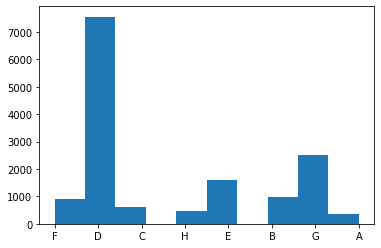

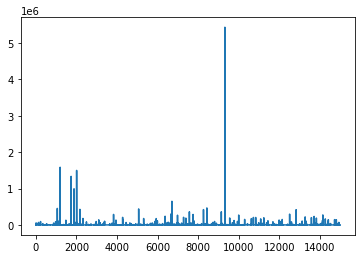

In [22]:
# Visualization
# Individual Plots
plt.hist(train_set["category"])
plt.show()
plt.plot(train_set["adview"])
plt.show()

In [23]:
# Remove videos with adview greater than 2000000 as outlier
train_set = train_set[train_set["adview"] <2000000]
train_set.shape

(14998, 9)

In [24]:
category = {'A': 1, 'B': 2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
train_set["category"] = train_set["category"].map(category)
train_set.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [25]:
train_set=train_set[train_set.views!='F']
train_set=train_set[train_set.likes!='F']
train_set=train_set[train_set.dislikes!='F']
train_set=train_set[train_set.comment!='F']

In [26]:
#Convert values to integers
train_set["views"]=pd.to_numeric(train_set["views"])
train_set["comment"]=pd.to_numeric(train_set["comment"])
train_set["likes"]=pd.to_numeric(train_set["likes"])
train_set["dislikes"]=pd.to_numeric(train_set["dislikes"])
train_set["adview"]=pd.to_numeric(train_set["adview"])

column_vidid=train_set['vidid']

In [27]:
train_set['duration'] = LabelEncoder().fit_transform(train_set['duration'])
train_set['vidid'] = LabelEncoder().fit_transform(train_set['vidid'])
train_set['published'] = LabelEncoder().fit_transform(train_set['published'])

train_set.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [28]:
def checki(x):
    y = x[2:]
    h, m, s, mm = "", "", "", ""
    P = ["H", "M", "S"]
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == P[0]:
                h = mm
                mm = ""
            elif i == P[1]:
                m = mm
                mm = ""
            else:
                s = mm
                mm = ""
    if h == "":
        h = "00"
    if m == "":
        m = "00"
    if s == "":
        s = "00"
    bp = h + ":" + m + ":" + s
    return bp

In [30]:
train=pd.read_csv("train.csv") 
mp = pd.read_csv("train.csv")["duration"] 
time  = mp.apply(checki) 
 
def func_sec(time_string): 
    h, m, s = time_string.split(':') 
    return int(h) * 3600 + int(m) * 60 + int(s) 
 
time1=time.apply(func_sec) 
 
train_set["duration"]=time1 
train_set.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [32]:
# Split Data 
Y_train = pd.DataFrame(data = train_set.iloc[:, 1].values, columns = ['target']) 
train_set=train_set.drop(["adview"],axis=1) 
train_set=train_set.drop(["vidid"],axis=1) 
train_set.head() 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train_set, Y_train, test_size=0.2, random_state=42) 

X_train.shape 

# Normalise Data 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.fit_transform(X_test) 

X_train.mean()


0.1739096800320488

In [33]:
# Evaluation Metrics 
from sklearn import metrics 
def print_error(X_test, y_test, model_name): 
    prediction = model_name.predict(X_test) 
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))   
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))   
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 
 
 
# Linear Regression 
from sklearn import linear_model 
linear_regression = linear_model.LinearRegression()  
linear_regression.fit(X_train, y_train)  
print_error(X_test,y_test, linear_regression) 
 
# Support Vector Regressor 
from sklearn.svm import SVR 
supportvector_regressor = SVR() 
supportvector_regressor.fit(X_train,y_train)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
# Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor 
decision_tree = DecisionTreeRegressor() 
decision_tree.fit(X_train, y_train) 
print_error(X_test,y_test, decision_tree) 
 
# Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor 
n_estimators = 200 
max_depth = 25 
min_samples_split=15 
min_samples_leaf=2 
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

Mean Absolute Error: 2677.4856557377047
Mean Squared Error: 890887742.7978142
Root Mean Squared Error: 29847.742675080375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3312.2229051693
Mean Squared Error: 593206148.4603553
Root Mean Squared Error: 24355.823707285188


In [40]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 8.5 MB/s 


In [44]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 4.7 MB/s 


In [46]:
# Artificial Neural Network 
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense 

 
ann = keras.models.Sequential([ 
                                Dense(6, activation="relu",  
                                input_shape=X_train.shape[1:]),  
                                Dense(6,activation="relu"), 
                                Dense(1) 
                                ]) 
 
optimizer=tf.optimizers.Adam() 
loss=keras.losses.mean_squared_error 
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100) 
 
ann.summary() 
 
print_error(X_test,y_test, ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 767406016.0000 - mean_squared_error: 767406016.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 767401856.0000 - mean_squared_error: 767401856.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767393920.0000 - mean_squared_error: 767393920.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 767379648.0000 - mean_squared_error: 767379648.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767355584.0000 - mean_squared_error: 767355584.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 767319296.0000 - mean_squared_error: 767319296.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767274560.0000 - mean_squared_error: 767274560.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 767217472.0000 - mean_squared_error:

In [47]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# **Testing**

In [48]:
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'vidid,views,likes,dislikes,comment,published,duration,category\nVID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B\nVID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F\nVID_13967,28534,31,11,1,2014-03-10,PT37M54S,D\nVID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G\nVID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B\nVID_10315,145820,215,29,19,2014-01-23,PT39M18S,D\nVID_7417,12921,169,3,73,2014-05-01,PT10M4S,D\nVID_17788,4502,65,2,8,2016-07-13,PT2M35S,F\nVID_14591,662956,1841,321,219,2014-01-13,PT13M57S,D\nVID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,B\nVID_10153,1144461,592,347,28,2015-02-16,PT1H8S,D\nVID_5667,161186,371,61,7,2017-02-24,PT30M12S,D\nVID_22775,10954,243,9,3,2016-05-27,PT1M44S,G\nVID_8353,3325,9,1,0,2013-07-23,PT4M16S,D\nVID_486,105950,420,31,76,2013-01-09,PT16M54S,A\nVID_17460,22626,74,1,29,2011-12-04,PT1M5S,E\nVID_5867,121718,696,21,303,2016-07-16,PT3M56S,D\nVID_15951,322722,310,73,48,2013-10-31,PT1H21M5S,E\nVID_14890,5567,69,2,7,2015-09-22,PT1M48S,

In [49]:
test = pd.read_csv("test.csv" )
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [51]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [52]:
# Removing character "F" present in data
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']

In [53]:
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [54]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test["category"]=test["category"].map(category)
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [55]:
# Convert values to integers for views, likes, comments, dislikes and adview
test["views"] = pd.to_numeric(test["views"])
test["comment"] = pd.to_numeric(test["comment"])
test["likes"] = pd.to_numeric(test["likes"])
test["dislikes"] = pd.to_numeric(test["dislikes"])
column_vidid=test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
test['duration']=LabelEncoder().fit_transform(test['duration'])
test['vidid']=LabelEncoder().fit_transform(test['vidid'])
test['published']=LabelEncoder().fit_transform(test['published'])
test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [56]:

# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

testdata=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

test["duration"]=time1
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [57]:
test=test.drop(["vidid"],axis=1)
test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = test
X_test=scaler.fit_transform(X_test)

In [59]:
prediction = model.predict(X_test)

In [60]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [61]:
prediction = prediction.rename(columns={0: "Adview"})

In [62]:
prediction.head()

,Adview
0,2139.354492
1,2314.137207
2,1205.088379
3,1063.925415
4,2054.285156


In [63]:
prediction.to_csv('predictions.csv')